# Feature Engineering & Data Preprocessing

In [5]:
import pandas as pd

input_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
output_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly.csv"

df = pd.read_csv(input_file, encoding="windows-1252")

df['Start date'] = pd.to_datetime(df['Start date'], format='mixed', errors='coerce')

df = df.dropna(subset=['Start date'])

hourly_df = df[df['Start date'].dt.minute == 0].reset_index(drop=True)

hourly_df['End date'] = hourly_df['Start date'] + pd.Timedelta(hours=1)

hourly_df.to_csv(output_file, index=False, encoding="windows-1252")

print(f"✅ Hourly dataset saved successfully at: {output_file}")


✅ Hourly dataset saved successfully at: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly.csv


In [6]:
import pandas as pd

hourly_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly.csv"
price_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
output_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices.csv"

hourly_df = pd.read_csv(hourly_file, encoding="windows-1252")
price_df = pd.read_csv(price_file, encoding="windows-1252")

hourly_df['Start date'] = pd.to_datetime(hourly_df['Start date'], errors='coerce')
hourly_df['End date'] = pd.to_datetime(hourly_df['End date'], errors='coerce')
price_df['Start date'] = pd.to_datetime(price_df['Start date'], errors='coerce')
price_df['End date'] = pd.to_datetime(price_df['End date'], errors='coerce')

merged_df = pd.merge(hourly_df, price_df, on=["Start date", "End date"], how="inner")

merged_df.to_csv(output_file, index=False, encoding="windows-1252")

print(f"✅ Merged dataset saved successfully at: {output_file}")


✅ Merged dataset saved successfully at: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices.csv


In [7]:
import pandas as pd

input_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv"
output_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs_Hourly.csv"

df = pd.read_csv(input_file, encoding="windows-1252")

df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
df['End date'] = pd.to_datetime(df['End date'], errors='coerce')

hourly_data = []

for _, row in df.iterrows():
    start_date = row['Start date']
    end_date = row['End date']
    
    hourly_timestamps = pd.date_range(start=start_date, end=end_date, freq='H', inclusive='left')
    
    hours_in_month = len(hourly_timestamps)

    for timestamp in hourly_timestamps:
        hourly_data.append([
            timestamp,  
            timestamp + pd.Timedelta(hours=1),  
            row['Balancing services [€] Original resolutions'] / hours_in_month,
            row['Network security of the TSOs [€] Original resolutions'] / hours_in_month,
            row['Countertrading [€] Original resolutions'] / hours_in_month
        ])

hourly_df = pd.DataFrame(hourly_data, columns=[
    'Start date', 'End date',
    'Balancing services [€/hour]',
    'Network security of the TSOs [€/hour]',
    'Countertrading [€/hour]'
])

hourly_df.to_csv(output_file, index=False, encoding="windows-1252")

print(f"✅ Hourly TSO costs dataset saved successfully at: {output_file}")


C:\Users\User\AppData\Local\Temp\ipykernel_243952\3302498849.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_timestamps = pd.date_range(start=start_date, end=end_date, freq='H', inclusive='left')


✅ Hourly TSO costs dataset saved successfully at: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs_Hourly.csv


In [11]:
import pandas as pd

electricity_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices.csv"
tso_costs_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs_Hourly.csv"
output_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices_and_TSO.csv"

electricity_df = pd.read_csv(electricity_file, encoding="windows-1252")
tso_df = pd.read_csv(tso_costs_file, encoding="windows-1252")

for df in [electricity_df, tso_df]:
    df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
    df['End date'] = pd.to_datetime(df['End date'], errors='coerce')

print("✅ Data loaded and datetime format converted.\n")

merged_df = pd.merge(electricity_df, tso_df, on=["Start date", "End date"], how="outer")

merged_df.to_csv(output_file, index=False, encoding="windows-1252")

print(f"✅ Final merged dataset saved at: {output_file}")


✅ Data loaded and datetime format converted.

✅ Final merged dataset saved at: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices_and_TSO.csv


In [12]:
import pandas as pd

merged_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices_and_TSO.csv"
tso_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs_Hourly.csv"
electricity_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices.csv"

merged_df = pd.read_csv(merged_file, encoding="windows-1252")
tso_df = pd.read_csv(tso_file, encoding="windows-1252")
electricity_df = pd.read_csv(electricity_file, encoding="windows-1252")

for df in [merged_df, tso_df, electricity_df]:
    df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
    df['End date'] = pd.to_datetime(df['End date'], errors='coerce')

print("✅ Data loaded and datetime format converted.\n")

original_rows = len(set(electricity_df['Start date']).union(set(tso_df['Start date'])))  
merged_rows = len(merged_df['Start date'].unique())  
extra_rows = merged_rows - original_rows

if extra_rows == 0:
    print("✅ No extra rows were added after merging.\n")
else:
    print(f"⚠️ {extra_rows} extra rows found after merging.\n")

duplicate_rows = merged_df.duplicated(subset=['Start date', 'End date']).sum()

if duplicate_rows == 0:
    print("✅ No duplicate timestamps found.\n")
else:
    print(f"⚠️ {duplicate_rows} duplicate timestamps detected! Please check the merged file.\n")

missing_values = merged_df.isnull().sum().sum()

if missing_values == 0:
    print("✅ No missing values found after merging.\n")
else:
    print(f"⚠️ {missing_values} missing values found! Some timestamps may not have data from both sources.\n")

missing_electricity = set(electricity_df['Start date']) - set(merged_df['Start date'])
missing_tso = set(tso_df['Start date']) - set(merged_df['Start date'])

if len(missing_electricity) == 0 and len(missing_tso) == 0:
    print("✅ All timestamps from original datasets exist in the merged dataset.\n")
else:
    print(f"⚠️ {len(missing_electricity)} timestamps from electricity dataset are missing in the merged file.\n")
    print(f"⚠️ {len(missing_tso)} timestamps from TSO dataset are missing in the merged file.\n")

print("🎯 **Merge validation complete. If all checks passed, the merge was successful!** 🚀")


✅ Data loaded and datetime format converted.

✅ No extra rows were added after merging.

⚠️ 6 duplicate timestamps detected! Please check the merged file.

⚠️ 4948 missing values found! Some timestamps may not have data from both sources.

✅ All timestamps from original datasets exist in the merged dataset.

🎯 **Merge validation complete. If all checks passed, the merge was successful!** 🚀


In [14]:
import pandas as pd

final_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices_and_TSO_CLEANED.csv"

final_df = pd.read_csv(final_file, encoding="windows-1252")

final_df['Start date'] = pd.to_datetime(final_df['Start date'], errors='coerce')
final_df['End date'] = pd.to_datetime(final_df['End date'], errors='coerce')

print("✅ Data loaded and datetime format converted.\n")

missing_values = final_df.isnull().sum().sum()
if missing_values == 0:
    print("✅ No missing values detected.\n")
else:
    print(f"⚠️ {missing_values} missing values detected in the dataset!\n")

duplicate_rows = final_df.duplicated(subset=['Start date', 'End date']).sum()
if duplicate_rows == 0:
    print("✅ No duplicate timestamps found.\n")
else:
    print(f"⚠️ {duplicate_rows} duplicate timestamps detected! Please review.\n")

time_diff = final_df['Start date'].diff().dropna()
time_gaps = time_diff[time_diff > pd.Timedelta(hours=1)]

if len(time_gaps) == 0:
    print("✅ No time gaps detected. Timestamps are sequential.\n")
else:
    print(f"⚠️ {len(time_gaps)} time gaps detected! Some hourly records may be missing.\n")

print("🎯 **Final dataset validation complete! If all checks passed, the dataset is ready for feature engineering.** 🚀")


✅ Data loaded and datetime format converted.

✅ No missing values detected.

✅ No duplicate timestamps found.

✅ No time gaps detected. Timestamps are sequential.

🎯 **Final dataset validation complete! If all checks passed, the dataset is ready for feature engineering.** 🚀


In [19]:
import pandas as pd

final_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Hourly_with_Prices_and_TSO_CLEANED.csv"
output_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Final_Dataset.csv"

df = pd.read_csv(final_file, encoding="windows-1252")

columns_to_drop = [
    # ❌ Forecasted Generation Data (Redundant)
    "FCST_GEN_DA_Total [MWh] Original resolutions",
    "FCST_GEN_DA_Photovoltaics and wind [MWh] Original resolutions",
    "FCST_GEN_DA_Wind offshore [MWh] Original resolutions",
    "FCST_GEN_DA_Wind onshore [MWh] Original resolutions",
    "FCST_GEN_DA_Photovoltaics [MWh] Original resolutions",
    "FCST_GEN_DA_Other [MWh] Original resolutions",
    "FCST_GEN_INTRADAY_Photovoltaics and wind [MWh] Original resolutions",
    "FCST_GEN_INTRADAY_Wind offshore [MWh] Original resolutions",
    "FCST_GEN_INTRADAY_Wind onshore [MWh] Original resolutions",
    "FCST_GEN_INTRADAY_Photovoltaics [MWh] Original resolutions",
    
    # ❌ Individual Cross-Border Flows (Keep Only Net Export)
    "CB_FLOW_Netherlands (export) [MWh] Original resolutions",
    "CB_FLOW_Netherlands (import) [MWh] Original resolutions",
    "CB_FLOW_Switzerland (export) [MWh] Original resolutions",
    "CB_FLOW_Switzerland (import) [MWh] Original resolutions",
    "CB_FLOW_Denmark (export) [MWh] Original resolutions",
    "CB_FLOW_Denmark (import) [MWh] Original resolutions",
    "CB_FLOW_Czech Republic (export) [MWh] Original resolutions",
    "CB_FLOW_Czech Republic (import) [MWh] Original resolutions",
    "CB_FLOW_Luxembourg (export) [MWh] Original resolutions",
    "CB_FLOW_Luxembourg (import) [MWh] Original resolutions",
    "CB_FLOW_Sweden (export) [MWh] Original resolutions",
    "CB_FLOW_Sweden (import) [MWh] Original resolutions",
    "CB_FLOW_Austria (export) [MWh] Original resolutions",
    "CB_FLOW_Austria (import) [MWh] Original resolutions",
    "CB_FLOW_France (export) [MWh] Original resolutions",
    "CB_FLOW_France (import) [MWh] Original resolutions",
    "CB_FLOW_Poland (export) [MWh] Original resolutions",
    "CB_FLOW_Poland (import) [MWh] Original resolutions",
    "CB_FLOW_Norway (export) [MWh] Original resolutions",
    "CB_FLOW_Norway (import) [MWh] Original resolutions",
    "CB_FLOW_Belgium (export) [MWh] Original resolutions",
    "CB_FLOW_Belgium (import) [MWh] Original resolutions",
    
    # ❌ Scheduled Cross-Border Trade (Not Needed)
    "CB_SCHED_Netherlands (export) [MWh] Original resolutions",
    "CB_SCHED_Netherlands (import) [MWh] Original resolutions",
    "CB_SCHED_Switzerland (export) [MWh] Original resolutions",
    "CB_SCHED_Switzerland (import) [MWh] Original resolutions",
    "CB_SCHED_Denmark (export) [MWh] Original resolutions",
    "CB_SCHED_Denmark (import) [MWh] Original resolutions",
    "CB_SCHED_Czech Republic (export) [MWh] Original resolutions",
    "CB_SCHED_Czech Republic (import) [MWh] Original resolutions",
    "CB_SCHED_Luxembourg (export) [MWh] Original resolutions",
    "CB_SCHED_Luxembourg (import) [MWh] Original resolutions",
    "CB_SCHED_Sweden (export) [MWh] Original resolutions",
    "CB_SCHED_Sweden (import) [MWh] Original resolutions",
    "CB_SCHED_Austria (export) [MWh] Original resolutions",
    "CB_SCHED_Austria (import) [MWh] Original resolutions",
    "CB_SCHED_France (export) [MWh] Original resolutions",
    "CB_SCHED_France (import) [MWh] Original resolutions",
    "CB_SCHED_Poland (export) [MWh] Original resolutions",
    "CB_SCHED_Poland (import) [MWh] Original resolutions",
    "CB_SCHED_Norway (export) [MWh] Original resolutions",
    "CB_SCHED_Norway (import) [MWh] Original resolutions",
    "CB_SCHED_Belgium (export) [MWh] Original resolutions",
    "CB_SCHED_Belgium (import) [MWh] Original resolutions",
    
    # ❌ Balancing & Reserve Procurement Prices (Already Included in TSO Costs)
    "RES_AFRR_Volume activated (+) [MWh] Original resolutions",
    "RES_AFRR_Procurement price (+) [€/MW] Original resolutions",
    "RES_MFRR_Procurement price (+) [€/MW] Original resolutions",
    "RES_FCR_Procurement price [€/MW] Original resolutions"
]

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

df.to_csv(output_file, index=False, encoding="windows-1252")

print(f"✅ Cleaned dataset saved successfully at: {output_file}")
print(f"✅ {len(columns_to_drop)} columns were removed to optimize the dataset.")


✅ Cleaned dataset saved successfully at: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Final_Dataset.csv
✅ 58 columns were removed to optimize the dataset.


In [28]:
import pandas as pd
import numpy as np

# Load dataset
file_path = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Final_Dataset.csv"
df = pd.read_csv(file_path, encoding='cp1252')

df['Start date'] = pd.to_datetime(df['Start date'])

df['hour'] = df['Start date'].dt.hour
df['day_of_week'] = df['Start date'].dt.dayofweek
df['week_of_year'] = df['Start date'].dt.isocalendar().week
df['month'] = df['Start date'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

lag_hours = [1, 6, 12, 24]
for lag in lag_hours:
    df[f'price_lag_{lag}h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].shift(lag)

df['rolling_avg_3h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=3, min_periods=1).mean()
df['rolling_avg_6h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=6, min_periods=1).mean()
df['rolling_avg_12h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=12, min_periods=1).mean()
df['rolling_avg_24h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=24, min_periods=1).mean()

df['price_diff_1h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].diff(1)
df['price_diff_6h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].diff(6)
df['price_diff_24h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].diff(24)

df['rolling_std_3h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=3, min_periods=1).std()
df['rolling_std_6h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=6, min_periods=1).std()
df['rolling_std_12h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=12, min_periods=1).std()
df['rolling_std_24h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=24, min_periods=1).std()
df['price_change_pct_1h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].pct_change(1)
df['price_change_pct_24h'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].pct_change(24)
df['volatility_index'] = df['Germany/Luxembourg [€/MWh] Original resolutions'].rolling(window=24, min_periods=1).apply(lambda x: x.max() - x.min(), raw=True)

df['total_generation'] = df[[
    'ACT_GEN_Biomass [MWh] Original resolutions', 'ACT_GEN_Hydropower [MWh] Original resolutions',
    'ACT_GEN_Wind offshore [MWh] Original resolutions', 'ACT_GEN_Wind onshore [MWh] Original resolutions',
    'ACT_GEN_Photovoltaics [MWh] Original resolutions', 'ACT_GEN_Other renewable [MWh] Original resolutions',
    'ACT_GEN_Nuclear [MWh] Original resolutions', 'ACT_GEN_Lignite [MWh] Original resolutions',
    'ACT_GEN_Hard coal [MWh] Original resolutions', 'ACT_GEN_Fossil gas [MWh] Original resolutions',
    'ACT_GEN_Hydro pumped storage [MWh] Original resolutions', 'ACT_GEN_Other conventional [MWh] Original resolutions']].sum(axis=1)
df['renewable_ratio'] = df[['ACT_GEN_Wind offshore [MWh] Original resolutions', 'ACT_GEN_Wind onshore [MWh] Original resolutions', 'ACT_GEN_Photovoltaics [MWh] Original resolutions', 'ACT_GEN_Hydropower [MWh] Original resolutions']].sum(axis=1) / df['total_generation']
df['demand_supply_ratio'] = df['ACT_CONS_Total (grid load) [MWh] Original resolutions'] / df['total_generation']
df['residual_load'] = df['ACT_CONS_Total (grid load) [MWh] Original resolutions'] - df[['ACT_GEN_Wind offshore [MWh] Original resolutions', 'ACT_GEN_Wind onshore [MWh] Original resolutions', 'ACT_GEN_Photovoltaics [MWh] Original resolutions', 'ACT_GEN_Hydropower [MWh] Original resolutions']].sum(axis=1)

df['total_net_export_import'] = df['CB_FLOW_Net export [MWh] Original resolutions']
df['export_ratio'] = df['CB_FLOW_Net export [MWh] Original resolutions'] / df['total_generation']
df['import_dependency'] = (df['CB_FLOW_Net export [MWh] Original resolutions'] * -1) / df['ACT_CONS_Total (grid load) [MWh] Original resolutions']

df['total_balancing_cost'] = df[['Balancing services [€/hour]', 'Network security of the TSOs [€/hour]', 'Countertrading [€/hour]']].sum(axis=1)
df['balancing_cost_per_MWh'] = df['total_balancing_cost'] / df['ACT_CONS_Total (grid load) [MWh] Original resolutions']
df['balancing_cost_per_MWh'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['balancing_cost_per_MWh'].fillna(0, inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(0, inplace=True)

df['balancing_reserve_trend'] = (
    df['RES_AFRR_Volume procured (+) [MW] Original resolutions'].rolling(window=6, min_periods=1).sum() +
    df['RES_MFRR_Volume procured (+) [MW] Original resolutions'].rolling(window=6, min_periods=1).sum()
)

df.to_csv('enhanced_dataset.csv', index=False, encoding='cp1252')

print("✅ Feature engineering completed! Dataset saved as 'enhanced_dataset.csv'")


C:\Users\User\AppData\Local\Temp\ipykernel_243952\1225647798.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balancing_cost_per_MWh'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_243952\1225647798.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

✅ Feature engineering completed! Dataset saved as 'enhanced_dataset.csv'


In [8]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\enhanced_dataset.csv"
df = pd.read_csv(file_path, encoding="cp1252")

numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

df[numeric_cols] = df[numeric_cols].fillna(method='ffill')  
df[numeric_cols] = df[numeric_cols].fillna(method='bfill')  
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  

df.to_csv(r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\enhanced_cleaned_dataset.csv", encoding="cp1252", index=False)

print("✅ Missing values handled. Cleaned dataset saved as 'enhanced_cleaned_dataset.csv'.")


C:\Users\User\AppData\Local\Temp\ipykernel_122648\535606223.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill')  # Forward-fill for time-series data
C:\Users\User\AppData\Local\Temp\ipykernel_122648\535606223.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='bfill')  # Backward-fill as a fallback


✅ Missing values handled. Cleaned dataset saved as 'enhanced_cleaned_dataset.csv'.


In [9]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\enhanced_cleaned_dataset.csv"
df = pd.read_csv(file_path, encoding="cp1252")

numeric_cols = df.select_dtypes(include=[np.number]).columns

missing_values = df[numeric_cols].isna().sum()
missing_values = missing_values[missing_values > 0]  

inf_values = df[numeric_cols].isin([np.inf, -np.inf]).sum()
inf_values = inf_values[inf_values > 0]  

threshold = 1e6  
large_values = (df[numeric_cols].abs() > threshold).sum()
large_values = large_values[large_values > 0]  

report = pd.DataFrame({
    "Missing Values": missing_values,
    "Infinity Values": inf_values,
    "Large Values (>1M)": large_values
}).fillna(0)

report.to_csv(r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\data_integrity_report.csv", encoding="cp1252")

print("✅ Data integrity check complete. Report saved as 'data_integrity_report.csv'.")
print("\n🔎 Columns with missing values:\n", missing_values)
print("\n🔎 Columns with infinity values:\n", inf_values)
print("\n🔎 Columns with large values:\n", large_values)


✅ Data integrity check complete. Report saved as 'data_integrity_report.csv'.

🔎 Columns with missing values:
 Series([], dtype: int64)

🔎 Columns with infinity values:
 Series([], dtype: int64)

🔎 Columns with large values:
 Series([], dtype: int64)


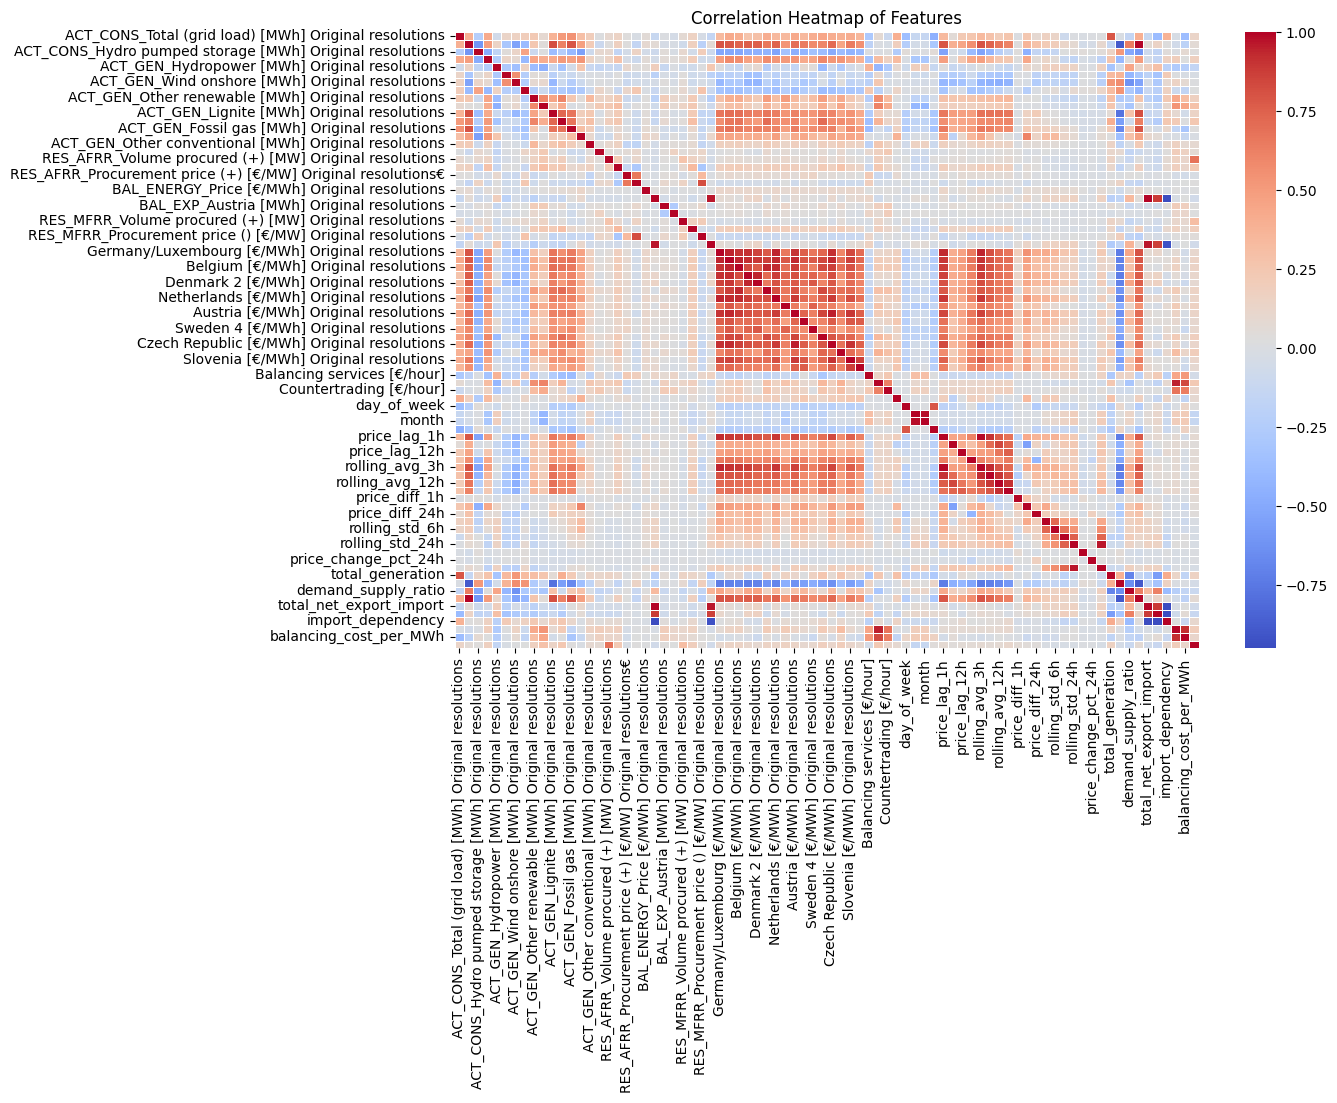

✅ Correlation analysis complete. Results saved as 'correlation_analysis.csv'.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\enhanced_cleaned_dataset.csv"
df = pd.read_csv(file_path, encoding="cp1252")

df = df.drop(columns=["Start date", "End date"], errors='ignore')

target = "Germany/Luxembourg [€/MWh] Original resolutions"

correlation_matrix = df.corr()

price_correlation = correlation_matrix[target].sort_values(ascending=False)

price_correlation.to_csv(r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\correlation_analysis.csv", encoding="cp1252")

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

print("✅ Correlation analysis complete. Results saved as 'correlation_analysis.csv'.")


In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
data_path = "C:\\Users\\User\\Desktop\\The Electricity Price Forecasting Challenge\\enhanced_cleaned_dataset.csv"
df = pd.read_csv(data_path, encoding="windows-1252")
price_column = "Germany/Luxembourg [€/MWh] Original resolutions"

Q1 = df[price_column].quantile(0.25)
Q3 = df[price_column].quantile(0.75)
IQR = Q3 - Q1

df["anomaly_iqr"] = ((df[price_column] < (Q1 - 1.5 * IQR)) | (df[price_column] > (Q3 + 1.5 * IQR))).astype(int)

df["z_score"] = zscore(df[price_column])

df["anomaly_zscore"] = (np.abs(df["z_score"]) > 3).astype(int)

iso_forest = IsolationForest(contamination=0.01, random_state=42)
df["anomaly_isolation_forest"] = iso_forest.fit_predict(df[[price_column]])

df["anomaly_isolation_forest"] = (df["anomaly_isolation_forest"] == -1).astype(int)

df["anomaly_label"] = (df["anomaly_iqr"] | df["anomaly_zscore"] | df["anomaly_isolation_forest"]).astype(int)

df.drop(columns=["z_score", "anomaly_iqr", "anomaly_zscore", "anomaly_isolation_forest"], inplace=True)

df.to_csv("enhanced_dataset_with_anomalies.csv", index=False)

print("✅ Anomaly detection labels have been added to the dataset!")


✅ Anomaly detection labels have been added to the dataset!


In [5]:
import pandas as pd

file_path = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\enhanced_dataset_with_anomalies.csv"

final_df = pd.read_csv(file_path, encoding="windows-1252")

print("📌 **List of All Columns in the Final Dataset:**\n")
for i, col in enumerate(final_df.columns):
    print(f"{i+1}. {col}")

print("\n📌 **Basic Statistical Summary:**")
print(final_df.describe(include='all'))  

print("\n📌 **Number of Unique Values Per Column:**")
print(final_df.nunique())

missing_values = final_df.isnull().sum()
print("\n📌 **Missing Values Per Column:**")
print(missing_values[missing_values > 0])



📌 **List of All Columns in the Final Dataset:**

1. Start date
2. End date
3. ACT_CONS_Total (grid load) [MWh] Original resolutions
4. ACT_CONS_Residual load [MWh] Original resolutions
5. ACT_CONS_Hydro pumped storage [MWh] Original resolutions
6. ACT_GEN_Biomass [MWh] Original resolutions
7. ACT_GEN_Hydropower [MWh] Original resolutions
8. ACT_GEN_Wind offshore [MWh] Original resolutions
9. ACT_GEN_Wind onshore [MWh] Original resolutions
10. ACT_GEN_Photovoltaics [MWh] Original resolutions
11. ACT_GEN_Other renewable [MWh] Original resolutions
12. ACT_GEN_Nuclear [MWh] Original resolutions
13. ACT_GEN_Lignite [MWh] Original resolutions
14. ACT_GEN_Hard coal [MWh] Original resolutions
15. ACT_GEN_Fossil gas [MWh] Original resolutions
16. ACT_GEN_Hydro pumped storage [MWh] Original resolutions
17. ACT_GEN_Other conventional [MWh] Original resolutions
18. RES_AFRR_Volume activated () [MWh] Original resolutions
19. RES_AFRR_Volume procured (+) [MW] Original resolutions
20. RES_AFRR_Volume

 # 1. XGBRegressor Ensemble Model

X_train: (13339, 80), y_train: (13339,)
X_val: (2858, 80), y_val: (2858,)
X_unseen: (2859, 80), y_unseen: (2859,)
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - loss: 71.2012
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 33.5707
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - loss: 32.8715
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - loss: 32.2510
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - loss: 10.3922
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - loss: 6.6461
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - loss: 5.5962
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - loss: 4.5448
Epoch 9/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 3.8563
Epoch 10/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - loss: 3.6652
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Shape of y_pred_xgb_unseen: (2859,)
Shape of y_

C:\Users\User\AppData\Local\Temp\ipykernel_196624\3304373103.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="Blues_r")


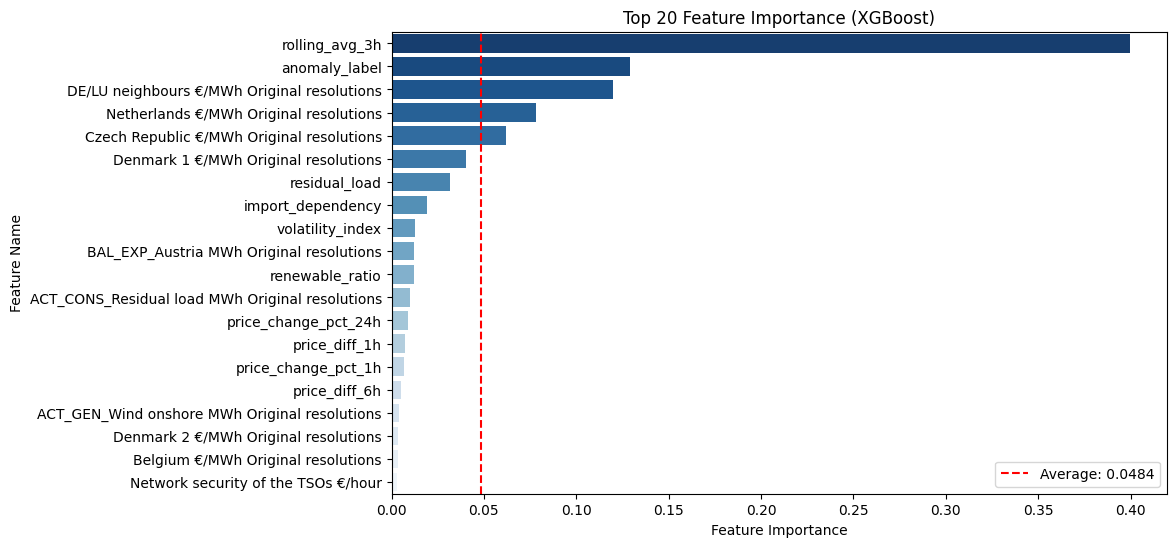

 98%|===================| 13121/13339 [01:31<00:01]        

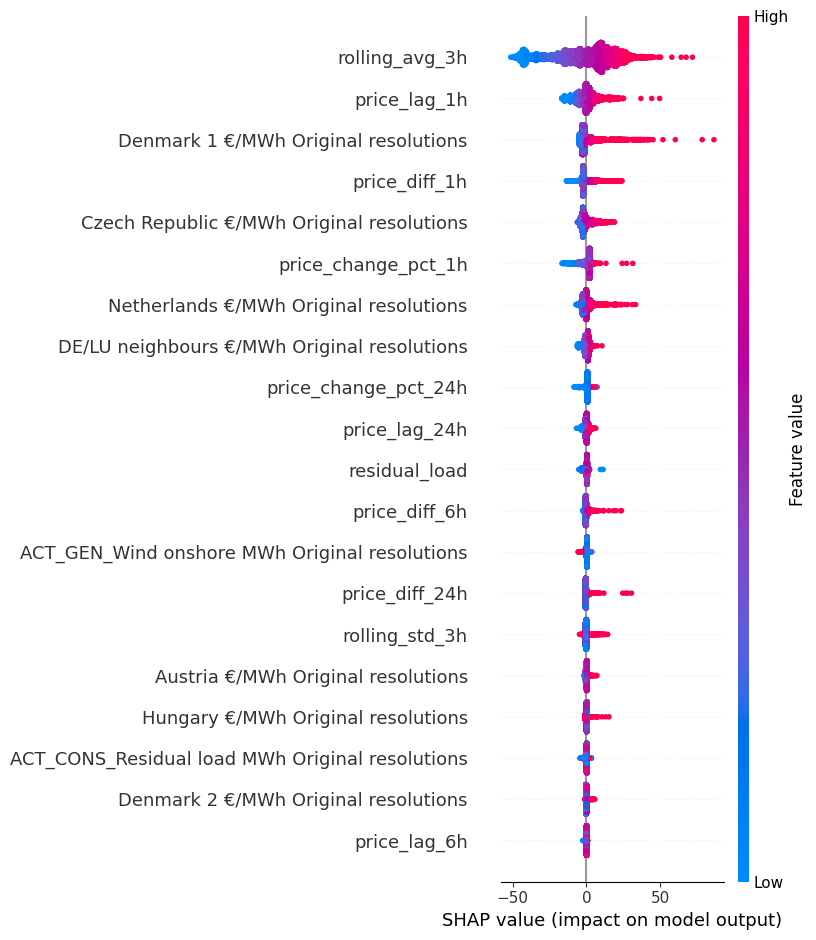

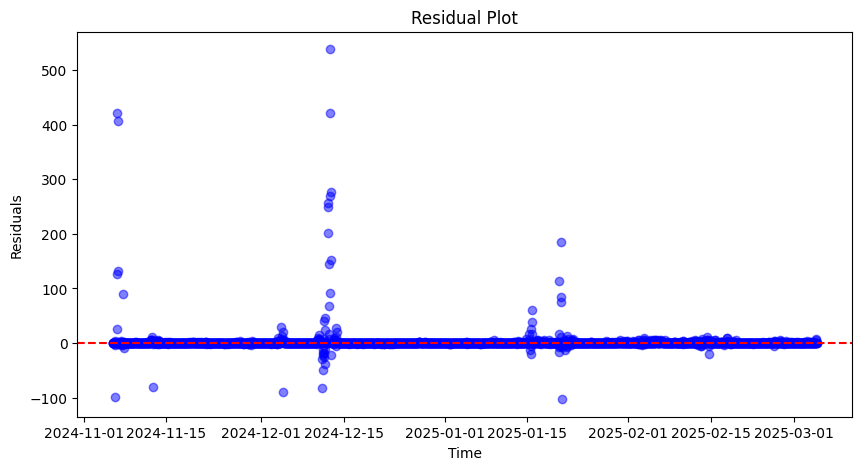

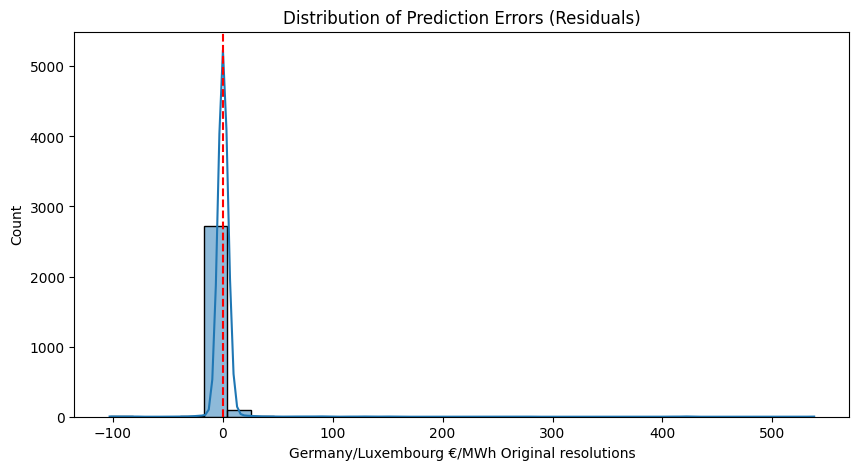

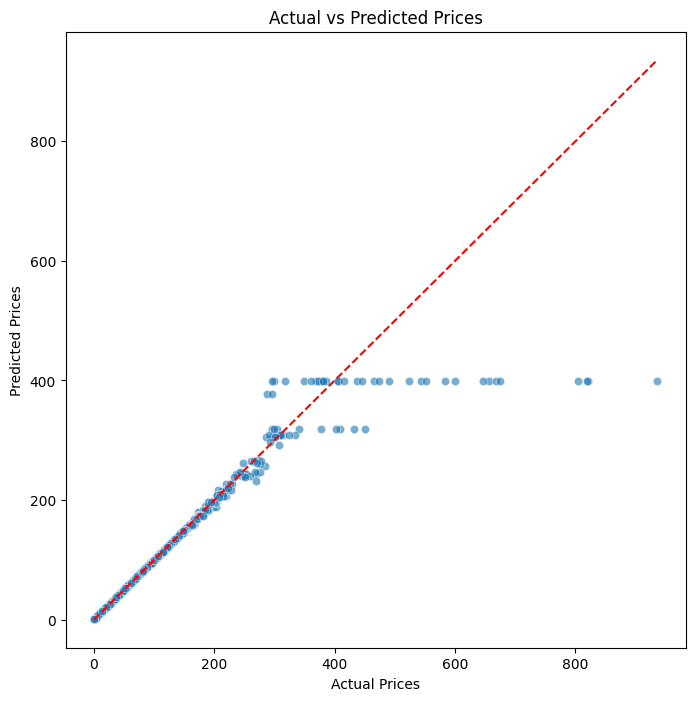

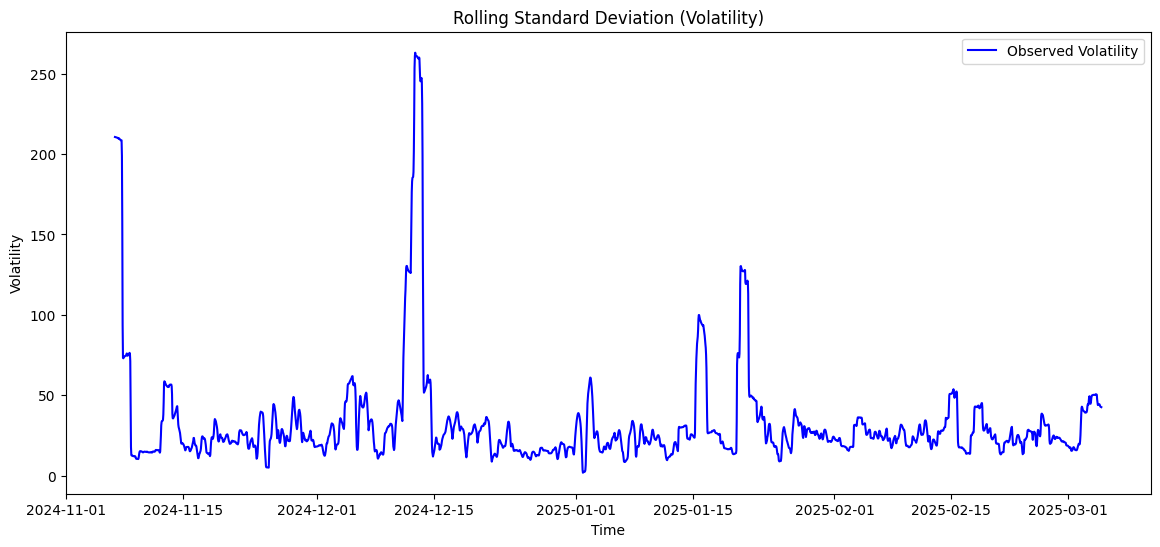

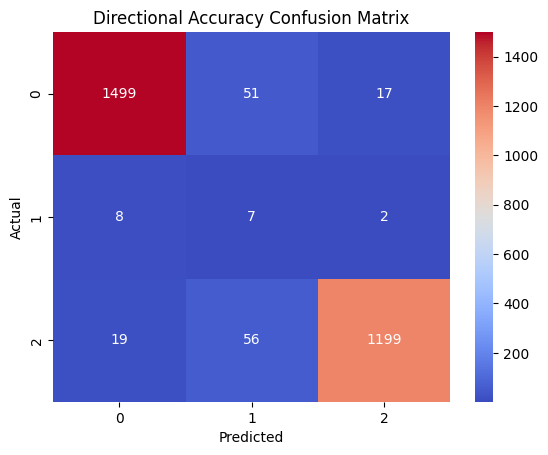

✅ CSV file 'C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\Models\electricity_price_forecast_results.csv' has been saved with rolling STD confidence intervals!


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, 
                             r2_score, mean_absolute_percentage_error)
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from scipy.stats import norm
from sklearn.linear_model import Ridge
from tensorflow.keras.losses import Huber
from sklearn.model_selection import GridSearchCV


output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\Models"
os.makedirs(output_dir, exist_ok=True)

data_path = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\enhanced_dataset_with_anomalies.csv"
df = pd.read_csv(data_path, encoding="windows-1252", parse_dates=['Start date'])
df = df.sort_values(by='Start date')
df.columns = df.columns.str.replace(r"[\[\]<>]", "", regex=True)
df.set_index('Start date', inplace=True)

TARGET = "Germany/Luxembourg €/MWh Original resolutions"
features = df.drop(columns=['End date', TARGET])
target = df[TARGET]

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=False)
X_val, X_unseen, y_val, y_unseen = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_unseen: {X_unseen.shape}, y_unseen: {y_unseen.shape}")

# --- XGBoost Grid Search for Best Model ---
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0.1, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1]
}
grid_search = GridSearchCV(XGBRegressor(objective="reg:squarederror"), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

X_unseen = X_unseen[X_train.columns]
y_pred_xgb_val = best_xgb.predict(X_val)
y_pred_xgb_unseen = best_xgb.predict(X_unseen)

# --- Ridge Regression Model ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge_val = ridge.predict(X_val)
y_pred_ridge_unseen = ridge.predict(X_unseen)

# --- LSTM Model ---
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_lstm = np.array(X_val).reshape((X_val.shape[0], X_val.shape[1], 1))
X_unseen_lstm = np.array(X_unseen).reshape((X_unseen.shape[0], X_unseen.shape[1], 1))

lstm = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])

lstm.compile(optimizer='adam', loss=Huber(delta=1.0))
lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_lstm_val = lstm.predict(X_val_lstm).flatten()
y_pred_lstm_unseen = lstm.predict(X_unseen_lstm).flatten()

# --- Ensure consistency of predictions ---
print(f"Shape of y_pred_xgb_unseen: {y_pred_xgb_unseen.shape}")
print(f"Shape of y_pred_ridge_unseen: {y_pred_ridge_unseen.shape}")
print(f"Shape of y_pred_lstm_unseen: {y_pred_lstm_unseen.shape}")

# ✅ Rolling STD Confidence Intervals Based on Residuals on Unseen Set
residuals_unseen = y_unseen.values - y_pred_final  # erorile pe setul de test

rolling_std_unseen = pd.Series(residuals_unseen).rolling(window=24).std().bfill()

assert len(rolling_std_unseen) == len(y_pred_final)

ci_lower = y_pred_final - 1.96 * rolling_std_unseen.values
ci_upper = y_pred_final + 1.96 * rolling_std_unseen.values

# --- Stacking Model ---
meta_val = np.column_stack([y_pred_xgb_val, y_pred_ridge_val, y_pred_lstm_val])
meta_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42, objective="reg:squarederror")
meta_model.fit(meta_val, y_val)

meta_test = np.column_stack([y_pred_xgb_unseen, y_pred_ridge_unseen, y_pred_lstm_unseen])
y_pred_final = meta_model.predict(meta_test)

# --- Evaluation Metrics ---
rmse_unseen = np.sqrt(mean_squared_error(y_unseen, y_pred_final))
mae_unseen = mean_absolute_error(y_unseen, y_pred_final)
r2_unseen = r2_score(y_unseen, y_pred_final)
y_unseen_safe = np.where(y_unseen.values == 0, 1e-6, y_unseen.values)
def mean_directional_accuracy(y_actual, y_predicted):
    """
    Compute Mean Directional Accuracy (MDA) to evaluate the ability of a model to predict direction changes.
    """
    y_actual_diff = np.sign(np.diff(y_actual))  # Direcția reală (creștere/scădere)
    y_pred_diff = np.sign(np.diff(y_predicted))  # Direcția prezisă

    min_length = min(len(y_actual_diff), len(y_pred_diff))  # Asigurare lungime egală
    accuracy = np.mean(y_actual_diff[:min_length] == y_pred_diff[:min_length])  # Procent direcții corecte

    return accuracy * 100  # Conversie la %
mda_final = mean_directional_accuracy(y_unseen.values, y_pred_final)

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# --- Print Results ---
print("\n📌 Model Performance on Unseen Data:")
print(f"✅ RMSE: {rmse_unseen:.4f}")
print(f"✅ MAE: {mae_unseen:.4f}")
print(f"✅ R2 Score: {r2_unseen:.4f}")
print(f"✅ Mean Directional Accuracy (MDA): {mda_final:.2f}%")
print(f"✅ SMAPE: {smape(y_unseen, y_pred_final):.4f}%")

results = pd.DataFrame({
    "Model": ["XGBoost", "Ridge", "LSTM", "Meta-Model"],
    "RMSE": [np.sqrt(mean_squared_error(y_unseen, y_pred_xgb_unseen)),
             np.sqrt(mean_squared_error(y_unseen, y_pred_ridge_unseen)),
             np.sqrt(mean_squared_error(y_unseen, y_pred_lstm_unseen)),
             rmse_unseen],
    "MAE": [mean_absolute_error(y_unseen, y_pred_xgb_unseen),
            mean_absolute_error(y_unseen, y_pred_ridge_unseen),
            mean_absolute_error(y_unseen, y_pred_lstm_unseen),
            mae_unseen],
    "R2 Score": [r2_score(y_unseen, y_pred_xgb_unseen),
                 r2_score(y_unseen, y_pred_ridge_unseen),
                 r2_score(y_unseen, y_pred_lstm_unseen),
                 r2_unseen]
})
print(results)

# --- Directional Accuracy ---
y_unseen_diff = np.sign(np.diff(y_unseen))[:len(y_pred_final)-1]  
y_pred_diff = np.sign(np.diff(y_pred_final))[:len(y_unseen)-1]

min_length = min(len(y_unseen_diff), len(y_pred_diff))
y_unseen_diff = y_unseen_diff[:min_length]
y_pred_diff = y_pred_diff[:min_length]

directional_acc = accuracy_score(y_unseen_diff, y_pred_diff)

# --- Extreme Price Movement Accuracy ---
threshold = 0.15 * np.mean(y_unseen)
extreme_actual = np.abs(np.diff(y_unseen)) > threshold
extreme_predicted = np.abs(np.diff(y_pred_final)) > threshold
extreme_actual = extreme_actual[:len(extreme_predicted)]
extreme_accuracy = accuracy_score(extreme_actual, extreme_predicted)
print(f"✅ Directional Accuracy: {directional_acc * 100:.2f}%")
print(f"✅ Extreme Price Movement Accuracy: {extreme_accuracy * 100:.2f}%")


def save_and_show_plot(filename):
    """Helper function to save and display plots."""
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()
    
# Top 20 Feature Importance
feature_importance = best_xgb.feature_importances_
feat_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="Blues_r")
plt.axvline(x=feat_importance_df["Importance"].mean(), color='red', linestyle='dashed', label=f'Average: {feat_importance_df["Importance"].mean():.4f}')
plt.legend()
plt.title("Top 20 Feature Importance (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
save_and_show_plot("feature_importance_xgb.png")

# SHAP Feature Importance 
explainer = shap.Explainer(best_xgb, X_train)  
shap_values = explainer(X_train)  
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_train, show=False)  
save_and_show_plot("shap_feature_importance.png")

## Residual Plot
residuals = y_unseen - y_pred_final  
plt.figure(figsize=(10,5))
plt.scatter(y_unseen.index, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Time")
plt.ylabel("Residuals")
save_and_show_plot("residual_plot.png")

## Error Distribution Histogram
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Distribution of Prediction Errors (Residuals)")
save_and_show_plot("error_distribution.png")

## Actual vs Predicted Scatter
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_unseen, y=y_pred_final, alpha=0.6)  
plt.plot([min(y_unseen), max(y_unseen)], [min(y_unseen), max(y_unseen)], '--', color='red')  
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
save_and_show_plot("actual_vs_predicted.png")

##  Volatility Analysis
rolling_std = y_unseen.rolling(window=24).std()  
plt.figure(figsize=(14,6))
plt.plot(y_unseen.index, rolling_std, label='Observed Volatility', color='blue')
plt.title("Rolling Standard Deviation (Volatility)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
save_and_show_plot("volatility_analysis.png")

## Directional Accuracy Confusion Matrix
conf_matrix = confusion_matrix(y_unseen_diff, y_pred_diff)  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Directional Accuracy Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_and_show_plot("directional_accuracy_matrix.png")

# --- Final Results DataFrame ---
results_df = pd.DataFrame({
    "Timestamp": y_unseen.index,  
    "Actual Price": y_unseen.values,  
    "Predicted Price": y_pred_final,  
    "Residuals": residuals_unseen,  
    "Confidence Interval Lower": ci_lower,
    "Confidence Interval Upper": ci_upper,
})


csv_path = os.path.join(output_dir, "electricity_price_forecast_results.csv")
results_df.to_csv(csv_path, index=False)
print(f"✅ CSV file '{csv_path}' has been saved with rolling STD confidence intervals!")


# 2. LGBMRegressor Ensemble Model

X_train: (13339, 80), y_train: (13339,)
X_val: (2858, 80), y_val: (2858,)
X_unseen: (2859, 80), y_unseen: (2859,)
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - loss: 68.3507
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - loss: 32.5786
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - loss: 15.0578
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - loss: 6.7507
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 5.0216
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - loss: 4.2329
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 3.6934
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 3.0988
Epoch 9/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 2.8669
Epoch 10/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 2.7798
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Shape of y_pred_lgbm_unseen: (2859,)
Shape of y_pr

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_196624\3003367737.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="Blues_r")


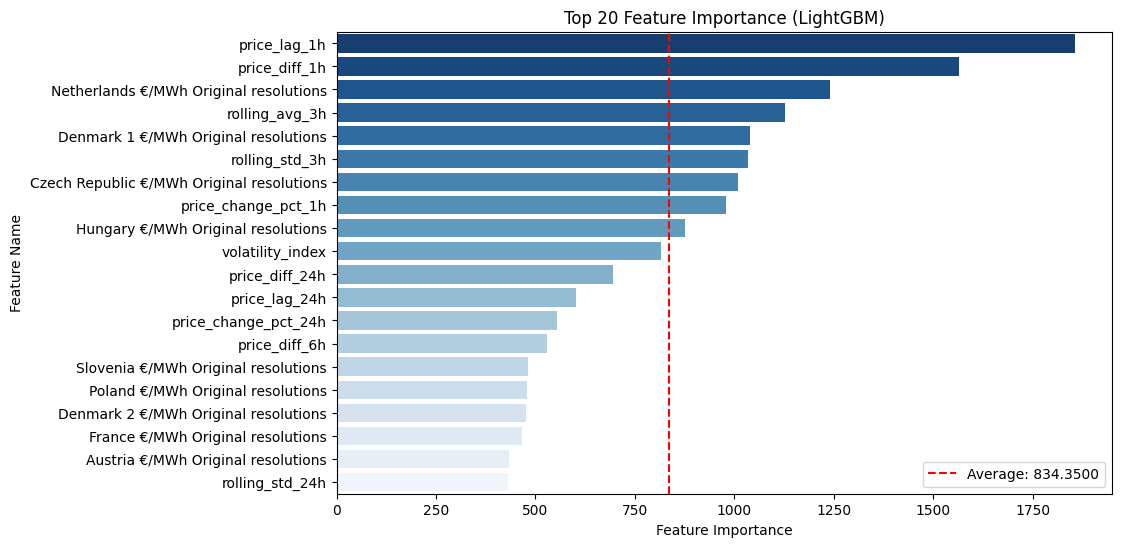

100%|===================| 13322/13339 [10:21<00:00]        

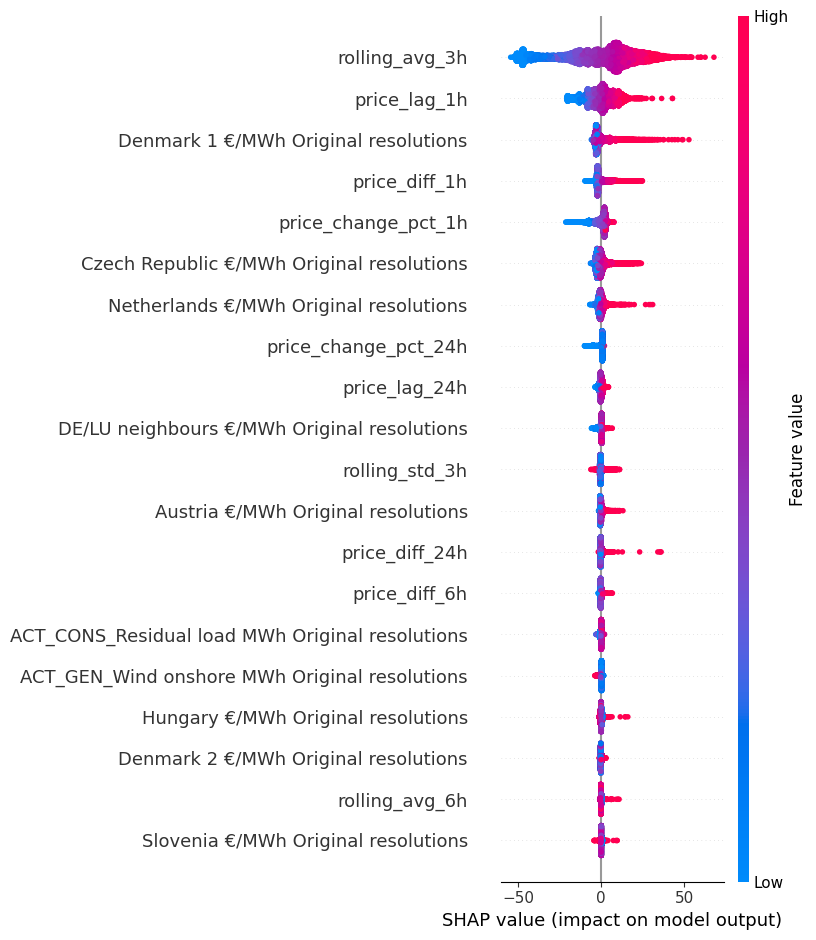

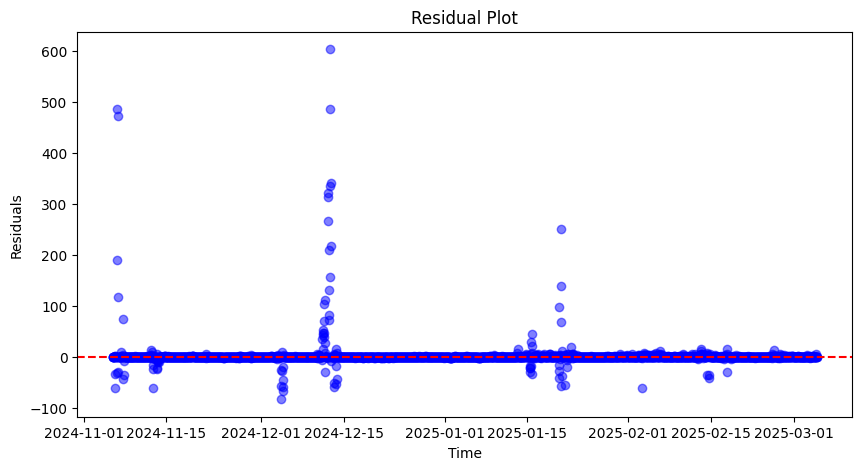

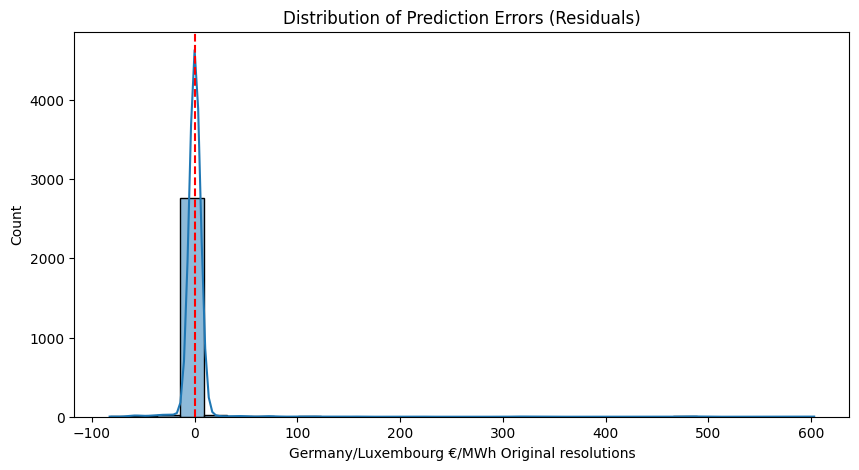

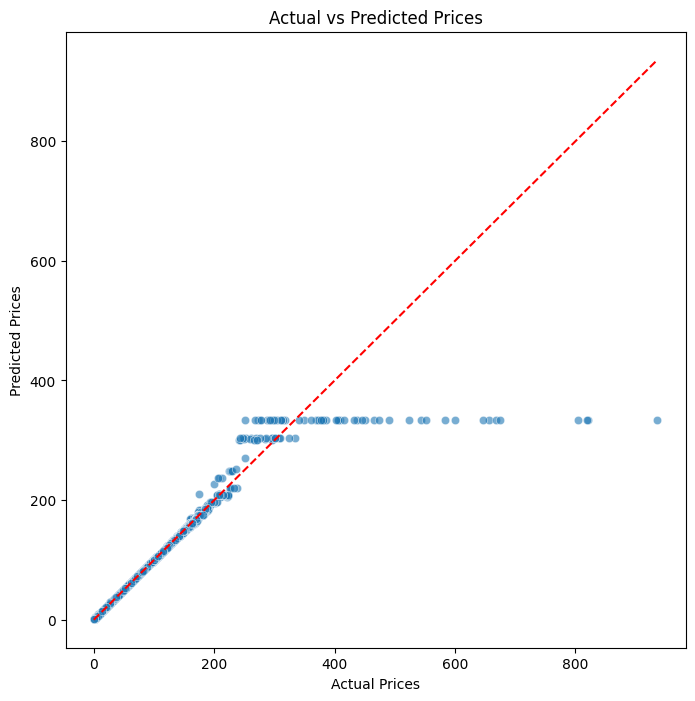

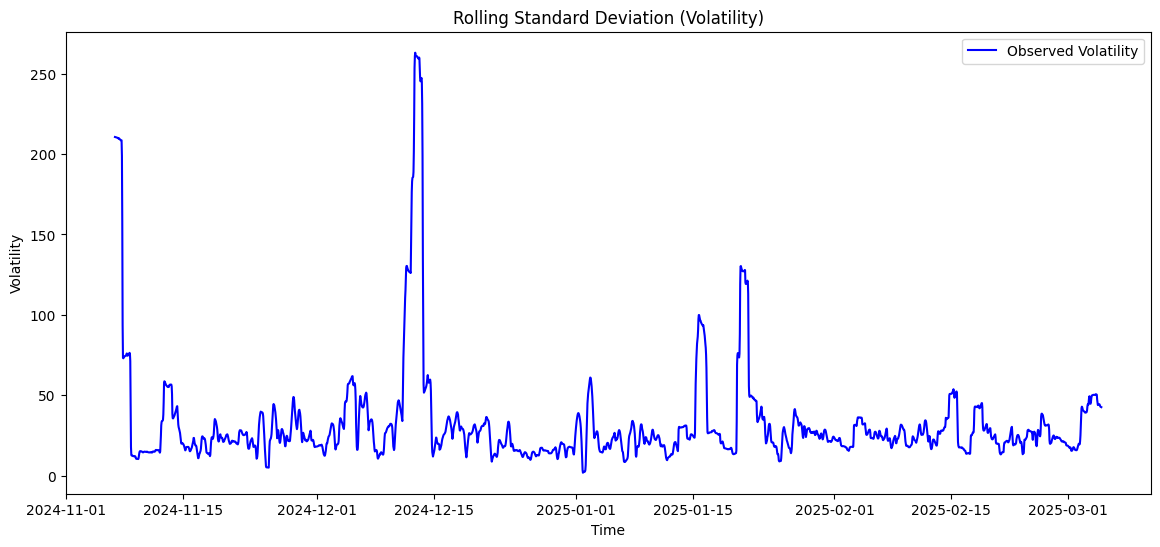

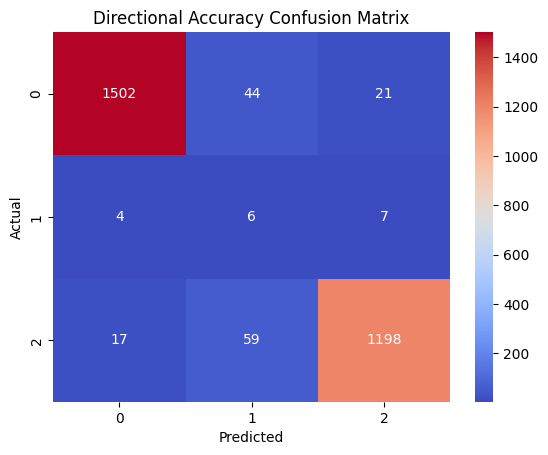

✅ CSV file 'C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\Models\electricity_price_forecast_results.csv' has been saved with rolling STD confidence intervals!


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, 
                             r2_score, mean_absolute_percentage_error)
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from scipy.stats import norm
from sklearn.linear_model import Ridge
from arch import arch_model
from tensorflow.keras.losses import Huber


output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\Models"
os.makedirs(output_dir, exist_ok=True)

data_path = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\enhanced_dataset_with_anomalies.csv"
df = pd.read_csv(data_path, encoding="windows-1252", parse_dates=['Start date'])
df = df.sort_values(by='Start date')
df.columns = df.columns.str.replace(r"[\[\]<>]", "", regex=True)
df.set_index('Start date', inplace=True)

TARGET = "Germany/Luxembourg €/MWh Original resolutions"
features = df.drop(columns=['End date', TARGET])
target = df[TARGET]

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=False)
X_val, X_unseen, y_val, y_unseen = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_unseen: {X_unseen.shape}, y_unseen: {y_unseen.shape}")

# --- LightGBM Model ---
param_dist = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1],
    'min_gain_to_split': [0.01, 0.1],
    'min_child_samples': [10, 20, 50],
    'feature_fraction': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    LGBMRegressor(objective="regression", verbose=-1),
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Get the best LightGBM model
best_lgbm = random_search.best_estimator_
best_lgbm.fit(X_train, y_train)
y_pred_lgbm_val = best_lgbm.predict(X_val)
y_pred_lgbm_unseen = best_lgbm.predict(X_unseen)

# --- Ridge Regression Model ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge_val = ridge.predict(X_val)
y_pred_ridge_unseen = ridge.predict(X_unseen)

# --- LSTM Model ---
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_lstm = np.array(X_val).reshape((X_val.shape[0], X_val.shape[1], 1))
X_unseen_lstm = np.array(X_unseen).reshape((X_unseen.shape[0], X_unseen.shape[1], 1))

lstm = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])

lstm.compile(optimizer='adam', loss=Huber(delta=1.0))
lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

y_pred_lstm_val = lstm.predict(X_val_lstm).flatten()
y_pred_lstm_unseen = lstm.predict(X_unseen_lstm).flatten()

# --- Ensure consistency of predictions ---
print(f"Shape of y_pred_lgbm_unseen: {y_pred_lgbm_unseen.shape}")
print(f"Shape of y_pred_ridge_unseen: {y_pred_ridge_unseen.shape}")
print(f"Shape of y_pred_lstm_unseen: {y_pred_lstm_unseen.shape}")


# ✅ Rolling STD Confidence Intervals Based on Residuals on Unseen Set
residuals_unseen = y_unseen.values - y_pred_final  # erorile pe setul de test
rolling_std_unseen = pd.Series(residuals_unseen).rolling(window=24).std().bfill()
assert len(rolling_std_unseen) == len(y_pred_final)
ci_lower = y_pred_final - 1.96 * rolling_std_unseen.values
ci_upper = y_pred_final + 1.96 * rolling_std_unseen.values

# --- Stacking Model ---
meta_val = np.column_stack([y_pred_lgbm_val, y_pred_ridge_val, y_pred_lstm_val])
meta_model = LGBMRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
meta_model.fit(meta_val, y_val)

meta_test = np.column_stack([y_pred_lgbm_unseen, y_pred_ridge_unseen, y_pred_lstm_unseen])
y_pred_final = meta_model.predict(meta_test)

# --- Evaluation ---
y_unseen_safe = np.where(y_unseen.values == 0, 1e-6, y_unseen.values)
rmse_unseen = np.sqrt(mean_squared_error(y_unseen, y_pred_final))
mae_unseen = mean_absolute_error(y_unseen, y_pred_final)
r2_unseen = r2_score(y_unseen, y_pred_final)

def mean_directional_accuracy(y_actual, y_predicted):
    y_actual_diff = np.sign(np.diff(y_actual))
    y_pred_diff = np.sign(np.diff(y_predicted))
    min_length = min(len(y_actual_diff), len(y_pred_diff))
    accuracy = np.mean(y_actual_diff[:min_length] == y_pred_diff[:min_length])
    return accuracy * 100

mda_final = mean_directional_accuracy(y_unseen.values, y_pred_final)

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

print("\n📌 Model Performance on Unseen Data:")
print(f"✅ RMSE: {rmse_unseen:.4f}")
print(f"✅ MAE: {mae_unseen:.4f}")
print(f"✅ R2 Score: {r2_unseen:.4f}")
print(f"✅ Mean Directional Accuracy (MDA): {mda_final:.2f}%")
print(f"✅ SMAPE: {smape(y_unseen, y_pred_final):.4f}%")

results = pd.DataFrame({
    "Model": ["LightGBM", "Ridge", "LSTM", "Meta-Model"],
    "RMSE": [np.sqrt(mean_squared_error(y_unseen, y_pred_lgbm_unseen)),
             np.sqrt(mean_squared_error(y_unseen, y_pred_ridge_unseen)),
             np.sqrt(mean_squared_error(y_unseen, y_pred_lstm_unseen)),
             rmse_unseen],
    "MAE": [mean_absolute_error(y_unseen, y_pred_lgbm_unseen),
            mean_absolute_error(y_unseen, y_pred_ridge_unseen),
            mean_absolute_error(y_unseen, y_pred_lstm_unseen),
            mae_unseen],
    "R2 Score": [r2_score(y_unseen, y_pred_lgbm_unseen),
                 r2_score(y_unseen, y_pred_ridge_unseen),
                 r2_score(y_unseen, y_pred_lstm_unseen),
                 r2_unseen]
})
print(results)

# --- Directional Accuracy ---
y_unseen_diff = np.sign(np.diff(y_unseen))[:len(y_pred_final)-1]  
y_pred_diff = np.sign(np.diff(y_pred_final))[:len(y_unseen)-1]

min_length = min(len(y_unseen_diff), len(y_pred_diff))
y_unseen_diff = y_unseen_diff[:min_length]
y_pred_diff = y_pred_diff[:min_length]

directional_acc = accuracy_score(y_unseen_diff, y_pred_diff)

# --- Extreme Price Movement Accuracy ---
threshold = 0.15 * np.mean(y_unseen)
extreme_actual = np.abs(np.diff(y_unseen)) > threshold
extreme_predicted = np.abs(np.diff(y_pred_final)) > threshold
extreme_actual = extreme_actual[:len(extreme_predicted)]
extreme_accuracy = accuracy_score(extreme_actual, extreme_predicted)
print(f"✅ Directional Accuracy: {directional_acc * 100:.2f}%")
print(f"✅ Extreme Price Movement Accuracy: {extreme_accuracy * 100:.2f}%")


def save_and_show_plot(filename):
    """Helper function to save and display plots."""
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()

# Feature Importance 
feature_importance = best_lgbm.feature_importances_
feat_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="Blues_r")
plt.axvline(x=feat_importance_df["Importance"].mean(), color='red', linestyle='dashed', label=f'Average: {feat_importance_df["Importance"].mean():.4f}')
plt.legend()
plt.title("Top 20 Feature Importance (LightGBM)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.savefig(os.path.join(output_dir, "feature_importance_lgbm.png"))
plt.show()


# SHAP 
explainer = shap.Explainer(best_lgbm, X_train)
shap_values = explainer(X_train)
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_train, show=False)
plt.savefig(os.path.join(output_dir, "shap_feature_importance_lgbm.png"))
plt.show()

##  Residual Plot
residuals = y_unseen - y_pred_final  
plt.figure(figsize=(10,5))
plt.scatter(y_unseen.index, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Time")
plt.ylabel("Residuals")
save_and_show_plot("residual_plot.png")

##  Error Distribution Histogram
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Distribution of Prediction Errors (Residuals)")
save_and_show_plot("error_distribution.png")

## Actual vs Predicted Scatter
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_unseen, y=y_pred_final, alpha=0.6)  
plt.plot([min(y_unseen), max(y_unseen)], [min(y_unseen), max(y_unseen)], '--', color='red')  
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
save_and_show_plot("actual_vs_predicted.png")

##  Volatility Analysis
rolling_std = y_unseen.rolling(window=24).std()  
plt.figure(figsize=(14,6))
plt.plot(y_unseen.index, rolling_std, label='Observed Volatility', color='blue')
plt.title("Rolling Standard Deviation (Volatility)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
save_and_show_plot("volatility_analysis.png")

## Directional Accuracy Confusion Matrix
conf_matrix = confusion_matrix(y_unseen_diff, y_pred_diff)  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Directional Accuracy Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
save_and_show_plot("directional_accuracy_matrix.png")

# Final Results DataFrame 
results_df = pd.DataFrame({
    "Timestamp": y_unseen.index,  
    "Actual Price": y_unseen.values,  
    "Predicted Price": y_pred_final,  
    "Residuals": residuals_unseen,  
    "Confidence Interval Lower": ci_lower,
    "Confidence Interval Upper": ci_upper,
})


csv_path = os.path.join(output_dir, "electricity_price_forecast_results.csv")
results_df.to_csv(csv_path, index=False)
print(f"✅ CSV file '{csv_path}' has been saved with rolling STD confidence intervals!")


C:\Users\User\AppData\Local\Temp\ipykernel_196624\541968351.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, ax=ax, palette=colors[metric_name])
C:\Users\User\AppData\Local\Temp\ipykernel_196624\541968351.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, ax=ax, palette=colors[metric_name])
C:\Users\User\AppData\Local\Temp\ipykernel_196624\541968351.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=values, ax=ax, palette=colors[metric_name])
C:\Users\User\AppData\Local\Temp\ipykern

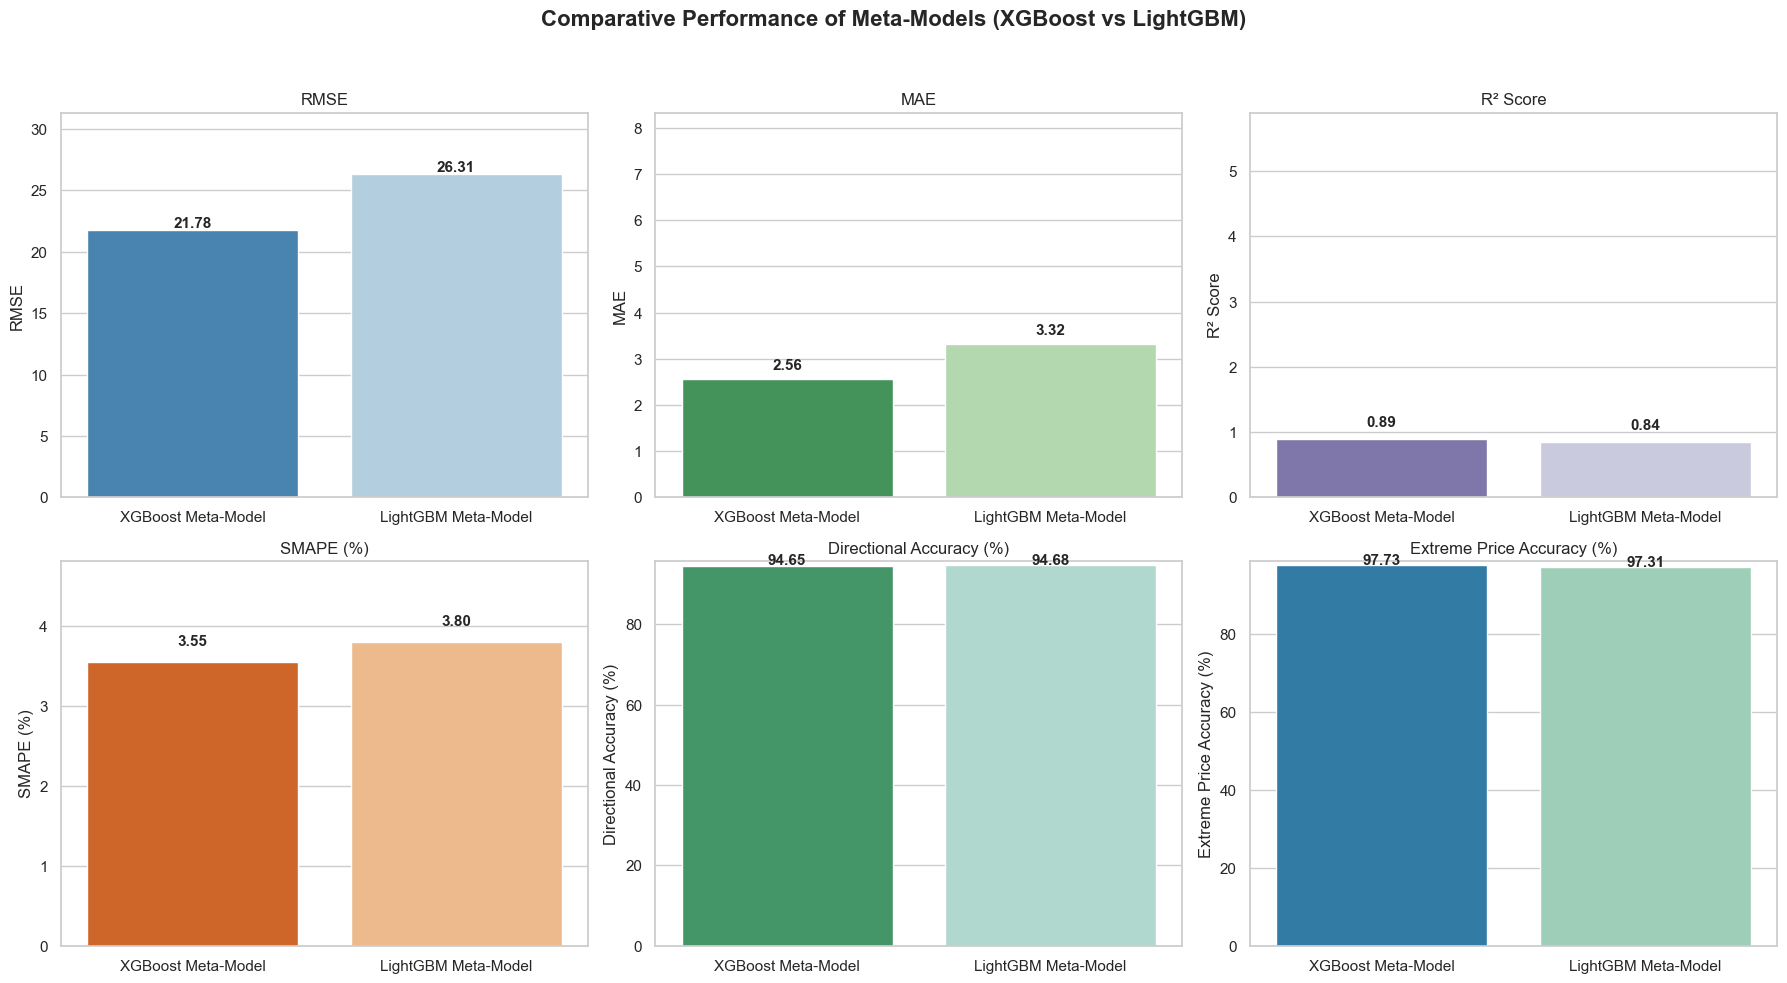

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["font.size"] = 11

models = ["XGBoost Meta-Model", "LightGBM Meta-Model"]
metrics = {
    "RMSE": [21.78, 26.31],
    "MAE": [2.56, 3.32],
    "R² Score": [0.893, 0.844],
    "SMAPE (%)": [3.55, 3.80],
    "Directional Accuracy (%)": [94.65, 94.68],
    "Extreme Price Accuracy (%)": [97.73, 97.31]
}
colors = {
    "RMSE": "Blues_r",
    "MAE": "Greens_r",
    "R² Score": "Purples_r",
    "SMAPE (%)": "Oranges_r",
    "Directional Accuracy (%)": "BuGn_r",
    "Extreme Price Accuracy (%)": "YlGnBu_r"
}

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for idx, (metric_name, values) in enumerate(metrics.items()):
    ax = axs[idx]
    sns.barplot(x=models, y=values, ax=ax, palette=colors[metric_name])
    ax.set_title(metric_name)
    ax.set_ylim(0, max(values) + (1 if "Accuracy" in metric_name or "%" in metric_name else 5))
    for i, v in enumerate(values):
        ax.text(i, v + 0.2, f"{v:.2f}", ha='center', fontweight='bold')
    ax.set_ylabel(metric_name)
plt.suptitle("Comparative Performance of Meta-Models (XGBoost vs LightGBM)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



#  Making Predictions with the Saved Models

Once the models have been trained and saved, they can be reused to make future predictions on new unseen data.  
This section explains the process of **loading the models** and **generating predictions** using new electricity market data.

---

##  Requirements for New Predictions

To use the models for forecasting, the following components are required:

### 1. Cleaned and Structured Input Data
- Must have **the same features** as used in training (`X_train`)
- Columns must be in **identical order**
- All preprocessing steps (date parsing, encoding handling, feature engineering) must be **replicated**

### 2. New Market Data
Obtainable from the official **SMARD Download Center**:  
 https://www.smard.de/en/downloadcenter/download-market-data/

Recommended categories:
- **Germany/Luxembourg Day-Ahead Prices**
- **Forecasted & Actual Load (Consumption)**
- **Generation by Source (Wind, Solar, Nuclear, etc.)**
- **Cross-Border Flows (Import/Export)**
- **Balancing Energy** 

---

##  Step 1 – Prepare the Input Dataset

```python
import pandas as pd

# Load and preprocess new data
new_data = pd.read_csv("new_dataset.csv", parse_dates=["Start date"])
new_data = new_data.sort_values("Start date")
new_data.set_index("Start date", inplace=True)

# Extract only the features used in training
X_new = new_data[X_train.columns]  # Ensure same columns and order
```

---

## Step 2 – Load the Trained Models

```python
import joblib
from tensorflow.keras.models import load_model

# Load base models
xgb_model = joblib.load("best_xgb.pkl")
ridge_model = joblib.load("ridge_model.pkl")
lstm_model = load_model("lstm_model.h5")

# Load meta-learner
meta_model = joblib.load("meta_model.pkl")
```

---

##  Step 3 – Generate Predictions

```python
import numpy as np

# Predict using each base model
xgb_pred = xgb_model.predict(X_new)
ridge_pred = ridge_model.predict(X_new)
lstm_pred = lstm_model.predict(X_new.values.reshape(X_new.shape[0], X_new.shape[1], 1)).flatten()

# Stack predictions for the meta-model
stacked = np.column_stack([xgb_pred, ridge_pred, lstm_pred])
final_prediction = meta_model.predict(stacked)

# Preview results
print(final_prediction[:10])
```

---

## Step 4 – Save Final Results

```python
prediction_df = pd.DataFrame({
    "Timestamp": X_new.index,
    "Predicted Price": final_prediction
})

# Save to CSV
prediction_df.to_csv("electricity_forecast_march.csv", index=False)
print("✅ Forecast saved successfully.")
```
